### Use-case: One of the shopping mall company has hired you as a Data Scientist. Your role is to create a model that can discover the linear patterns in the data which will have some sensible meaning based on the domain.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

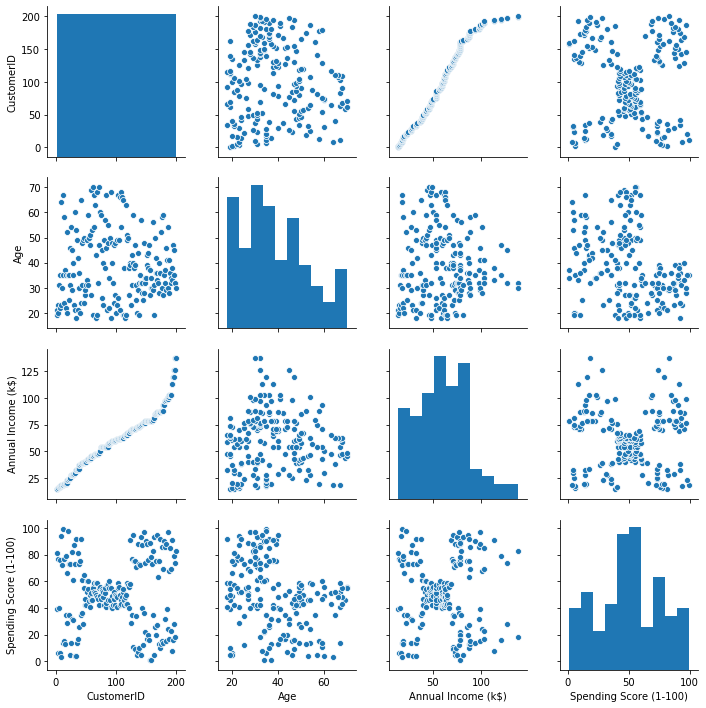

In [5]:
sns.pairplot(data)

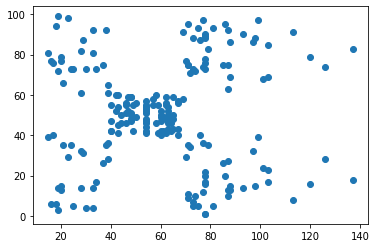

In [6]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

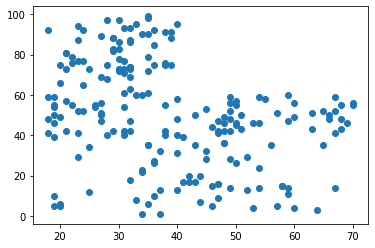

In [7]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

In [8]:
#From above graphs it is visible that spending score and annual income has are more linearly seperable
#Numpy array
features = data.iloc[:,[3,4]].values

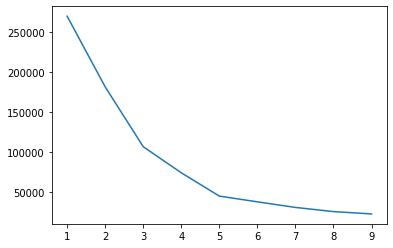

In [12]:
#Finding the Ideal K value
from sklearn.cluster import KMeans
tmpScore=[]
for i in range(1,10):
    m1 = KMeans(n_clusters=i)
    m1.fit(features)
    tmpScore.append(m1.inertia_) #Error Rate
    
plt.plot(range(1,10),tmpScore) #Found k=5 as ideal

In [13]:
#Above elbow graph signifies that 5 is the ideal k value as after 5 the graph is smooth and no further deflection
#Create a model and classify each data point
from sklearn.cluster import KMeans
finalModel = KMeans(n_clusters=5)
finalModel.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
#Making a label column to categorise the customers based on their annual income and spending score.
categoryOfCustomers = finalModel.predict(features)

In [16]:
finalData  = data.iloc[:,[1,2,3,4]]
finalData['categoryOfCustomers'] = categoryOfCustomers
finalData.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),categoryOfCustomers
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


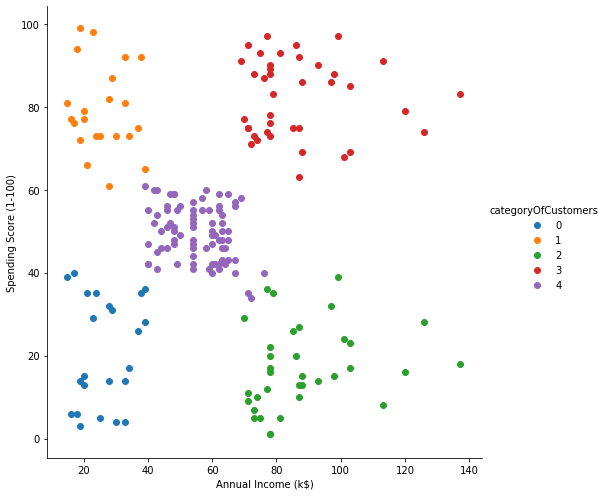

In [17]:
#Viz
sns.FacetGrid(finalData, hue='categoryOfCustomers', size = 7) \
    .map(plt.scatter, 'Annual Income (k$)', 'Spending Score (1-100)' ) \
    .add_legend()
plt.show()

In [18]:
finalData.to_csv('Finaldataset.csv' , index=False)

In [20]:
finalData.groupby('categoryOfCustomers')['Annual Income (k$)'].mean()

categoryOfCustomers
0    26.304348
1    25.727273
2    88.200000
3    86.538462
4    55.296296
Name: Annual Income (k$), dtype: float64

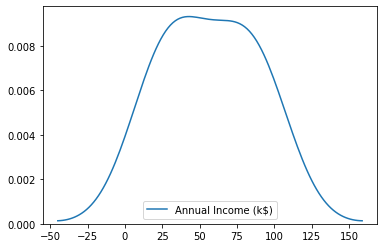

In [29]:
sns.kdeplot(finalData.groupby('categoryOfCustomers')['Annual Income (k$)'].mean())

In [21]:
finalData.groupby(['Genre','categoryOfCustomers'])['Genre'].value_counts()

Genre   categoryOfCustomers  Genre 
Female  0                    Female    14
        1                    Female    13
        2                    Female    16
        3                    Female    21
        4                    Female    48
Male    0                    Male       9
        1                    Male       9
        2                    Male      19
        3                    Male      18
        4                    Male      33
Name: Genre, dtype: int64

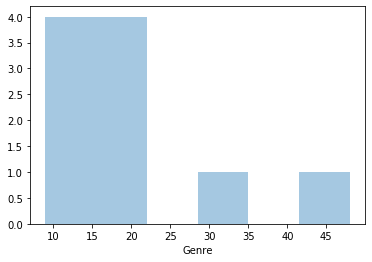

In [31]:
sns.distplot(finalData.groupby(['Genre','categoryOfCustomers'])['Genre'].value_counts(), kde=False)